# MERCHANT ANALYSIS REPORT

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from datetime import datetime
import os
from scripts.cleaning import clean_accounts_df #data cleaning script

In [2]:
#paths to data used
RAW_DATA = 'data/accounts Data.csv' 
CLEAN_DATA = 'data/clean_data.csv' #cleaned raw data


In [3]:
# Load raw dataset and display the first 5 rows
df= pd.read_csv('data/accounts Data.csv')
df.head()

,Merchant ID,Account Name,Account Type,Sector,MCC.,Account Owner,Account Status.,Activated Date,Country,Referral Source
0,174053,Roam and Rove Xpeditions,Travel Agent,Travel,4722- Travel Agencies Tour Operators,Elijah Makau,Proposal,NaN,Kenya,Employee Referral
1,120001,Multi Branch Main- Scenario 2 dashboards,CBO/Community Development,Retail,"5111- Stationery, Office Supplies, Printing an...",Tracy Biyaki,Finalized,"Aug 26, 2025",Kenya,Account Management Referral
2,107526,BUSH AND FOREST EXPLORERS LIMITED,Travel Agent,Travel,4722- Travel Agencies Tour Operators,Palme Paiton Katemana,Activated,"Oct 6, 2025",Tanzania,NaN
3,173980,FIVE EIGHT LIQUOR PALACE,Liquor Store,Retail,"5921- Package Stores- Beer, Wine and Liquor",Anthony Ngunyi,Activation Process,NaN,Kenya,Self Search
4,173960,Grandnexus Africa (SMC) LTD,Travel Agent,Travel,4722- Travel Agencies Tour Operators,Adella Asaasira,Activated,"Oct 6, 2025",Uganda,NaN


In [4]:
#Generate dscriptive statistics of the raw data
df.describe() 

,Merchant ID,Account Name,Account Type,Sector,MCC.,Account Owner,Account Status.,Activated Date,Country,Referral Source
count,4870,4870,4863,4862,4848,4870,4868,4637,4870,3924
unique,4870,4780,59,4,49,61,19,248,4,38
top,146637,Wash Dry Cleaning Services Limited,E-Commerce,Retail,5399-Miscellaneous General Merchant (Small Ret...,Elia Mwakijale,Finalized,"Sep 30, 2025",Kenya,Self Search
freq,1,7,832,1620,1331,205,3515,71,2500,1294


In [5]:
#Data Profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Dataset Profiling Report", explorative=True)
profile.to_file("data_profile.html")  # opens as a full HTML report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  8.56it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

There is a data cleaning script in scripts/cleaning. The function clean_accounts_df handles the data cleaning process.

In [6]:
#Clean data
from scripts.cleaning import clean_accounts_df #data cleaning script
df_clean = clean_accounts_df(df)
print(f"Cleaned data: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")


Cleaned data: 4870 rows, 14 columns


In [7]:
#Display the first 5 rows in the newly cleaned data
df_clean.head()

,merchant_id,account_name,account_type,sector,mcc,account_owner,account_status,activated_date,country,referral_source,mcc_code,conversion,activate_year,activate_month
0,174053,Roam and Rove Xpeditions,Travel Agent,Travel,4722- Travel Agencies Tour Operators,Elijah Makau,Proposal,2025-05-27,Kenya,Employee Referral,4722.0,0,2025,5
1,120001,Multi Branch Main- Scenario 2 dashboards,Cbo/Community Development,Retail,"5111- Stationery, Office Supplies, Printing an...",Tracy Biyaki,Finalized,2025-08-26,Kenya,Account Management Referral,5111.0,0,2025,8
2,107526,BUSH AND FOREST EXPLORERS LIMITED,Travel Agent,Travel,4722- Travel Agencies Tour Operators,Palme Paiton Katemana,Activated,2025-10-06,Tanzania,Self Search,4722.0,1,2025,10
3,173980,FIVE EIGHT LIQUOR PALACE,Liquor Store,Retail,"5921- Package Stores- Beer, Wine and Liquor",Anthony Ngunyi,Activation Process,2025-05-27,Kenya,Self Search,5921.0,0,2025,5
4,173960,Grandnexus Africa (SMC) LTD,Travel Agent,Travel,4722- Travel Agencies Tour Operators,Adella Asaasira,Activated,2025-10-06,Uganda,Self Search,4722.0,1,2025,10


In [8]:
#Save cleaned data
df_clean.to_csv(CLEAN_DATA, index=False)
print("Cleaned data saved to:", CLEAN_DATA)

Cleaned data saved to: data/clean_data.csv


In [9]:
#Display the cleaned data to find any missing data
df_clean = clean_accounts_df(df)
df_clean.isnull().sum()


merchant_id        0
account_name       0
account_type       0
sector             0
mcc                0
account_owner      0
account_status     0
activated_date     0
country            0
referral_source    0
mcc_code           0
conversion         0
activate_year      0
activate_month     0
dtype: int64

Since there are no missing data, analytics is the next step.

# 1. Merchant-Sector Distribution. 
The distribution of merchants across different sectors

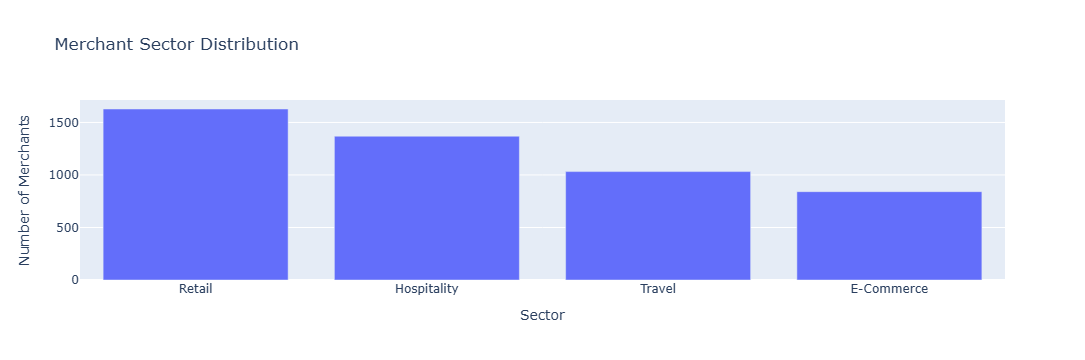

In [10]:
import plotly.express as px
# Count merchants per sector
sector_counts = df_clean['sector'].value_counts().reset_index()

# Plot with Plotly
px.bar(
    sector_counts,
    x='sector',
    y='count',
    title="Merchant Sector Distribution",
    labels={'sector': 'Sector', 'count': 'Number of Merchants'}
)


# Insights
1. The distribution shows a concentration in physical, service-oriented sectors (Retail, Hospitality).

2. The relatively smaller E-Commerce count could suggest:

* Potential growth opportunities for online business platforms.

* Need for targeted onboarding or outreach in digital sectors.

3. The data reflects that most of the customer base or revenue lies in retail sector.

# Recommendations
1. Encourage growth in E-Commerce in the age of technology. Try and attract more e-commerce merchants.
   

# 2. Merchant Distribution per Country per Sector
Distribution of merchants across different sectors across different countries


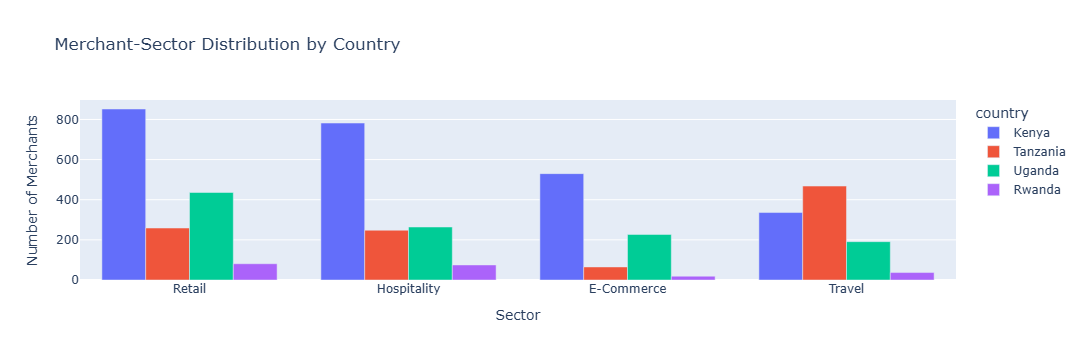

In [11]:

# Count merchants per sector by country
sector_counts = df_clean[['country', 'sector']].value_counts().reset_index()

# Plot with Plotly
px.bar(
    sector_counts,
    x='sector',
    y='count',
    color='country',
    barmode='group',
    title="Merchant-Sector Distribution by Country",
    labels={'sector': 'Sector', 'count': 'Number of Merchants'}
)


# Insights
* Kenya dominates across all sectors (retail, hospitality and e-commerce).
* Tanzania leads in travel sector
* Uganda is moderate in all sectors
*  Rwanda shows minimal merchant activity in all sectors.
# Recommendations
1. The overall trend shows that Kenya is the regional hub for most merchant activities, particularly in Retail and Hospitality. Copy this mechanism for slower coutries, especially Rwanda and Uganda.
2. Uganda’s consistent mid-level performance suggests steady but smaller-scale operations across industries. Increase engagement to attract more activity in the country as well as in other moderate countries.

# 3. Merchant Distribution with Status Conversion

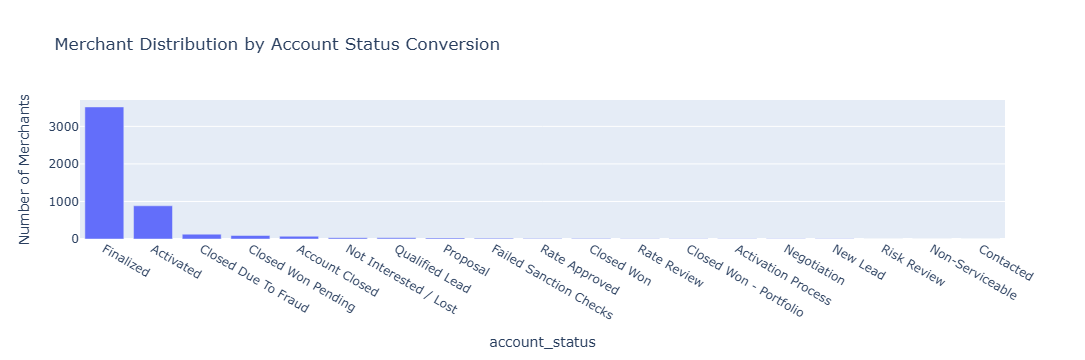

In [12]:

# Count merchants per conversion
sector_counts = df_clean['account_status'].value_counts().reset_index()

# Rename columns clearly
sector_counts.columns = ['account_status', 'count']

# Plot with Plotly
px.bar(
    sector_counts,
    x='account_status',
    y='count',
    title="Merchant Distribution by Account Status Conversion",
    labels={'sector': 'Sector', 'count': 'Number of Merchants'}
)


# Insights
* Most merchants' accounts have been finalized.
* The conversion distribution seems heavily skewed toward Finalized, suggesting strong completion rates.
* Very few merchants are stuck in intermediate stages like Proposal or Negotiation, which could mean either the process is efficient or there is low engagement at early stages.
* Fraud-related closures are minimal, which is positive for risk management.
# Recommendations
1. Investigate why Activated merchants are not moving to Finalized—is there a delay or barrier?
2. Assess if the low numbers in Proposal and Negotiation indicate missed opportunities or a streamlined onboarding process.

# 4. Merchant Distribution with Referral Source

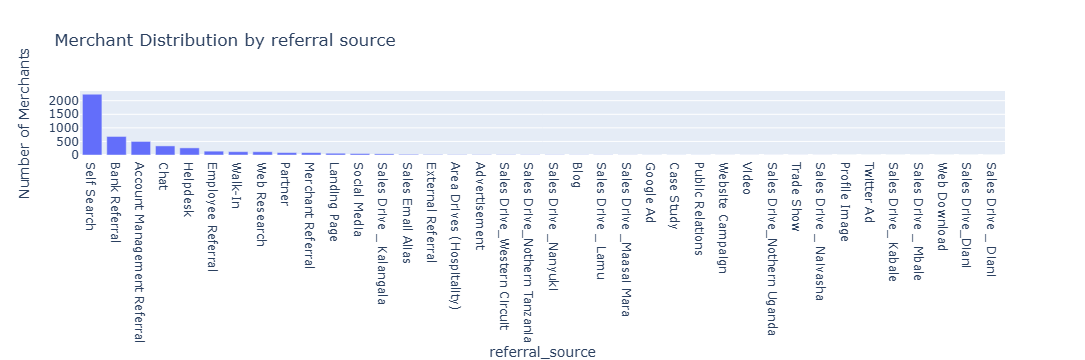

In [13]:

# Count merchants per referral source
sector_counts = df_clean['referral_source'].value_counts().reset_index()

# Rename columns clearly
sector_counts.columns = ['referral_source', 'count']

# Plot with Plotly
px.bar(
    sector_counts,
    x='referral_source',
    y='count',
    title="Merchant Distribution by referral source",
    labels={'sector': 'Sector', 'count': 'Number of Merchants'}
)


# Insights
* Organic acquisition (Self Search) is the strongest channel, which is positive for cost efficiency.
* Bank partnerships are the most effective external referral source.
* Sales Drives and Marketing Campaigns seem underperforming compared to digital and organic channels.
* The presence of many low-performing sources could indicate fragmented efforts or areas for optimization.
# Recommendations
1. Double down on Self-Service onboarding since Self Search is highly effective.
2. Strengthen bank partnerships to increase referrals.
3. Evaluate ROI on low-performing channels like Sales Drives and Social Media—either improve strategy or reallocate resources.


# 5. Account Type Breakdown

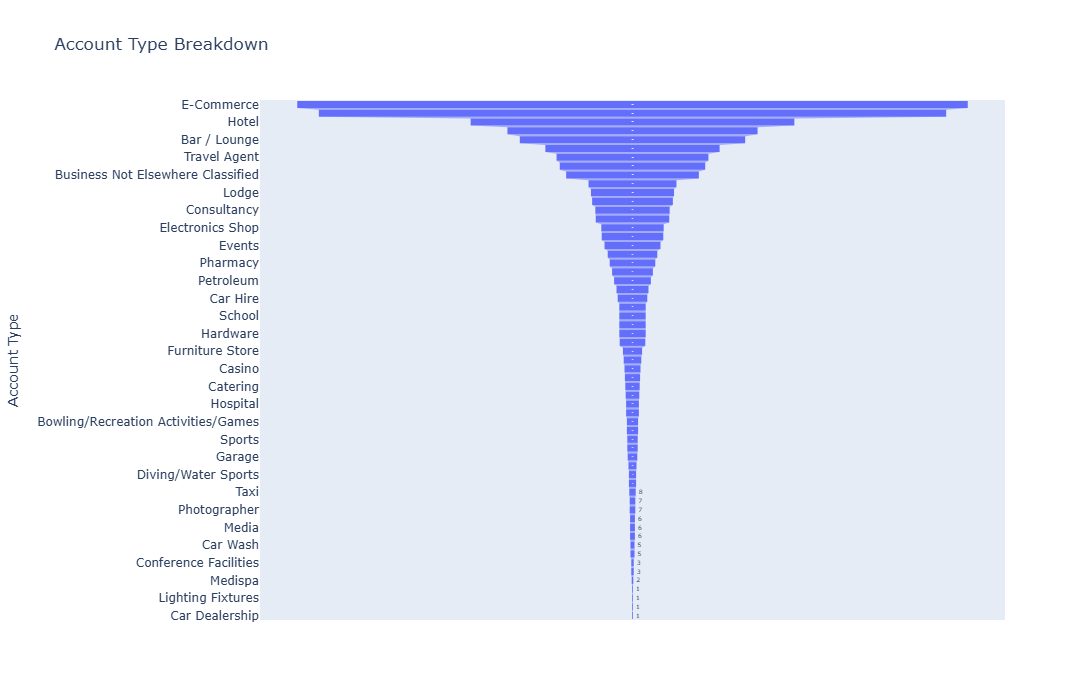

In [14]:

# Count occurrences of each account type
account_counts = df_clean['account_type'].value_counts().reset_index()
account_counts.columns = ['account_type', 'count']

# Create funnel chart
fig = px.funnel(
    account_counts,
    x='count',
    y='account_type',
    title="Account Type Breakdown ",
    labels={'account_type': 'Account Type', 'count': 'Number of Accounts'},
    height=700
)

fig.show()


# Insights
* E-Commerce is the leading sector, which aligns with global trends toward digital businesses.
* Hospitality-related categories (Hotel, Bar/Lounge, Travel Agent) are also significant, possibly due to tourism or service industry demand.
* Specialized services (e.g., Medispa, Lighting Fixtures,car dealership) have minimal representation, indicating niche markets.
# Recommendations
1. Focus marketing and onboarding strategies on high-volume sectors like E-Commerce and Hospitality.
2. Explore growth opportunities in underrepresented categories if they align with business goals.
3. Consider segment-specific campaigns for mid-tier categories like Consultancy and Electronics Shops.

# 6. Account Status by Country

In [15]:
status_sector = df_clean.groupby(['country', 'account_status']).size().reset_index(name='count')
px.bar(status_sector, x='account_status', y='count', color='country',
       barmode='group', title="Account Status by Country")


# Insights
* Kenya is the dominant market, contributing the largest share of finalized and activated accounts.
* Uganda and Tanzania have moderate activity, while Rwanda is significantly underrepresented.
* The onboarding process seems efficient since most accounts end up finalized, but Rwanda may need targeted strategies to improve conversions.
# Recommendations
1. Focus growth efforts in Rwanda to increase merchant acquisition and conversion.
2. Investigate sanction check failures in Kenya and Uganda to strengthen compliance processes.
4. Maintain strong engagement in Kenya while exploring expansion opportunities in Uganda, Rwanda and Tanzania.

# 7. Account Status by Referral Source

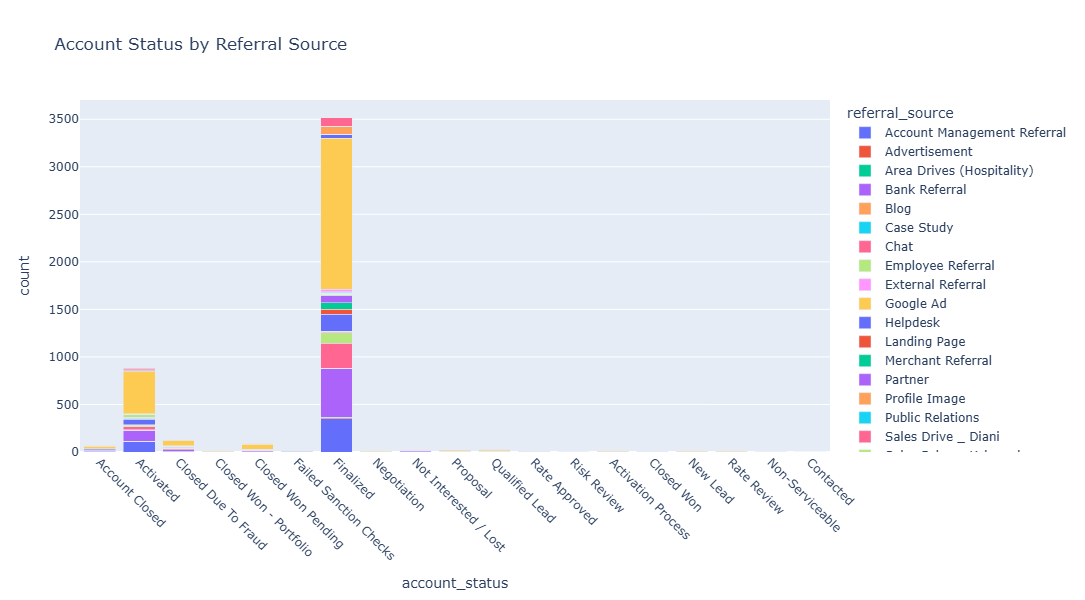

In [16]:
status_sector = df_clean.groupby(['referral_source', 'account_status']).size().reset_index(name='count')
fig=px.bar(status_sector, x='account_status', y='count', color='referral_source',
       barmode='stack', title="Account Status by Referral Source")

fig.update_layout(
    autosize=False,
    width=1000,   
    height=600,   
)
#fig.show()
fig.update_xaxes(tickangle=45)



# Insights
* Self Search is the largest contributor across most statuses, especially in “finalized” and "activated"
* Other notable contributors: Bank Referral, Sales Drive, and Helpdesk, but their volumes are much smaller compared to Self Search.
* Indicates a conversion gap between activation and finalized.
* Categories like “Account Closed,” “Checks,” “Fraud,” and “Pending” have minimal counts.
# Recommendations
1. Improve Conversion from Registration to Activation
2. Leverage Self Search Strength by using digital marketing to maintain and grow this channel.
3. Strengthen Secondary Channels like Bank Referral and Sales Drive which contribute moderately.
4. Address Seasonal or Operational Bottlenecks eg Investigate why activation numbers are low despite high registrations.
Streamline verification processes to reduce delays.
5. Monitor Fraud and Closed Accounts



# 8. Account Status by Sector

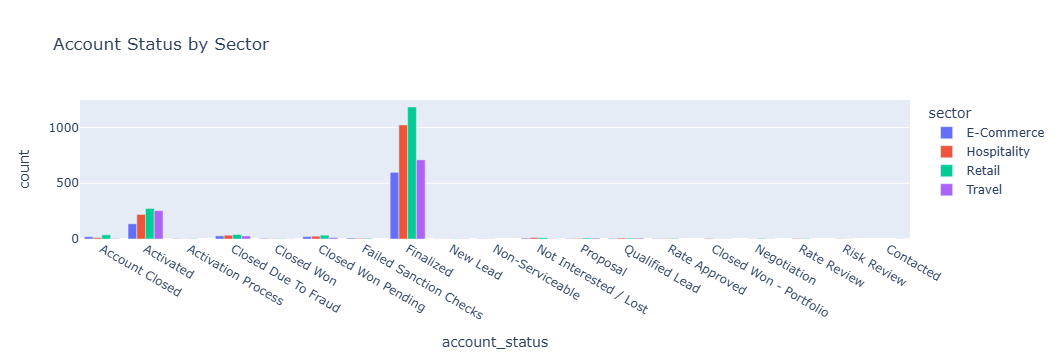

In [17]:
status_sector = df_clean.groupby(['sector', 'account_status']).size().reset_index(name='count')
px.bar(status_sector, x='account_status', y='count', color='sector',
       barmode='group', title="Account Status by Sector")


# Insights
* Finalized has the highest count across all sectors.
* Retail dominates finalized accounts with 1185 accounts finalized, followed by Hospitality (1024), Travel (710), and E-commerce (598).
* Activation is low compared to finalized.
* Categories like “New Lead,” “Proposal,” “Qualified Lead,” and “Closed Won” have very low counts.
# Recommendations
1. Continue scaling efforts in Retail.
2. Introduce loyalty programs and upsell strategies for finalized accounts to motivate owners to upscale after account creation.
3. Streamline onboarding processes.
4. Increase marketing and outreach campaigns eg targeted ads and partnerships to generate new leads for Hospitality and Travel.
5. E-Commerce sector lags behind—consider specialized campaigns or partnerships.

# 9. Sector Distribution by Account Status

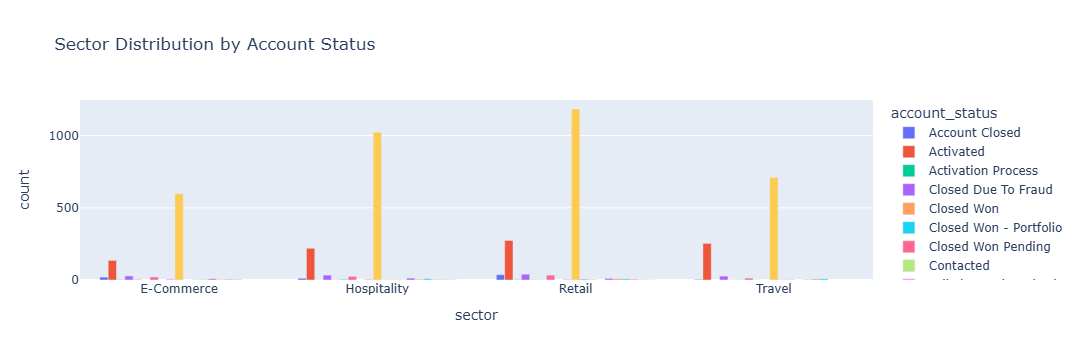

In [18]:
sector_country = df_clean.groupby(['account_status', 'sector']).size().reset_index(name='count')
px.bar(sector_country, x='sector', y='count', color='account_status', barmode='group',
       title="Sector Distribution by Account Status")


# Insights
* Retail is the strongest sector, both in finalized and activated accounts, indicating high engagement and successful conversions.
* Hospitality and Travel also show significant finalized numbers, aligning with service industry trends.
* E-Commerce, while present, has fewer finalized accounts compared to Retail and Hospitality, which may indicate growth potential.
* Failed sanction checks across sectors highlight the need for stronger compliance measures.
# Recommendations
1. Prioritize Retail and Hospitality for continued growth and support since they show strong performance.
2. Explore strategies to boost E-Commerce conversions, as this sector has high potential but lower finalized counts.
3. Address compliance challenges in Retail and Hospitality to reduce sanction check failures.
4. Consider sector-specific onboarding improvements to move activated accounts to finalized status faster.

# 10. Account Owner Distribution

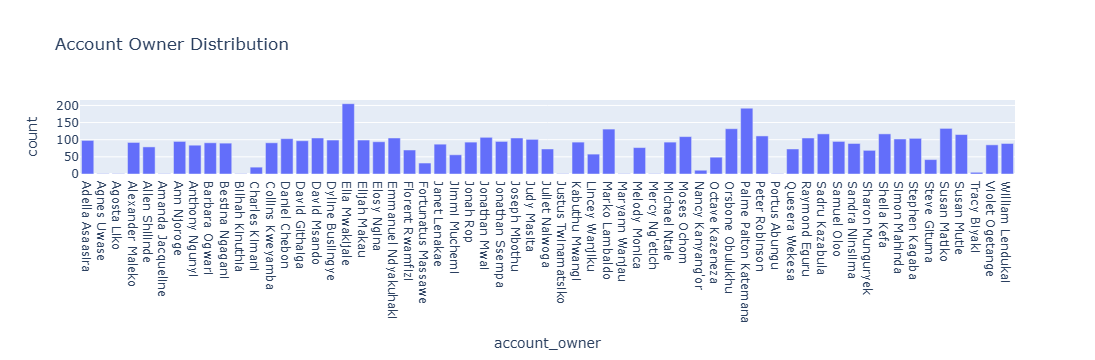

In [19]:
status_sector = df_clean.groupby('account_owner').size().reset_index(name='count')
px.bar(status_sector, x='account_owner', y='count',
       title="Account Owner Distribution")


# Insights
* Top performers manage substantially more accounts than the average, which could indicate higher efficiency or experience or possible workload imbalance that may need review.
* Most account owners have moderate account loads, suggesting a relatively balanced distribution overall.
# Recommendations
1. Analyze top performers to understand best practices and replicate success.
2. Review workload distribution to ensure fairness and prevent burnout.
3. Consider training or support for account owners with lower counts to improve performance.

# 11. Account Owner Distribution by Country

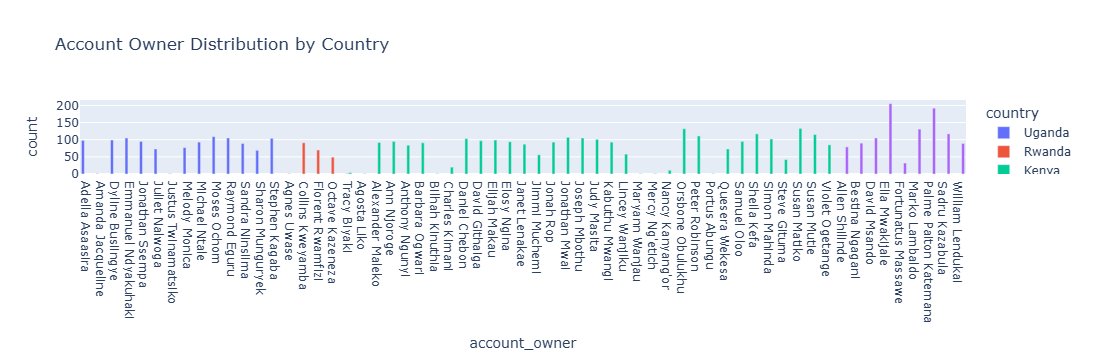

In [20]:
status_sector = df_clean.groupby(['account_owner','country']).size().reset_index(name='count')
px.bar(status_sector, x='account_owner', y='count',
       color='country',
       barmode='group',
       title="Account Owner Distribution by Country")


# Insights
* Kenya dominates in account ownership, possibly due to concentrated efforts or fewer account owners managing larger portfolios.
* Tanzania has a balanced distribution, which could mean better workload management but less concentration.
* Uganda and Rwanda may need more resources or strategies to increase account acquisition and ownership.
# Recommendations
1. Develop growth strategies for Rwanda and Uganda, such as hiring more account owners or boosting acquisition campaigns.
    

# 12. Account Onwer Distribution by Sector

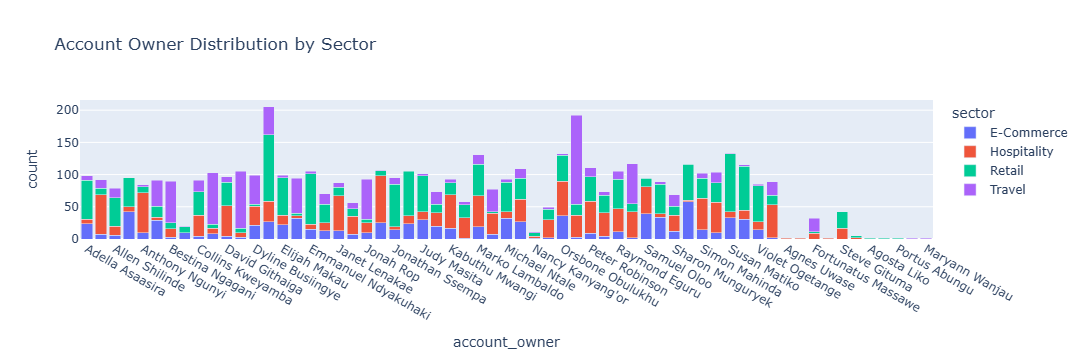

In [21]:
status_sector = df_clean.groupby(['account_owner','sector']).size().reset_index(name='count')
px.bar(status_sector, x='account_owner', y='count',
       color='sector',
       barmode='stack',
       title="Account Owner Distribution by Sector")


# Insights
* Merchant distribution is not uniform; some account owners are sector specialists (e.g., Travel-heavy or Retail-heavy), while others handle diverse portfolios.
* Retail and E-Commerce dominate the merchant base, which aligns with broader market trends.
* The spike in Travel for a few account owners could indicate regional or strategic focus.
# Recommendations
1. Identify high-performing account owners and analyze their strategies for replication.
2. Consider sector-based training or resource allocation for account owners who manage niche sectors like Travel.
3. Balance workloads by redistributing merchants if some account owners are overloaded.

# 13. Activation Trends Over the Years

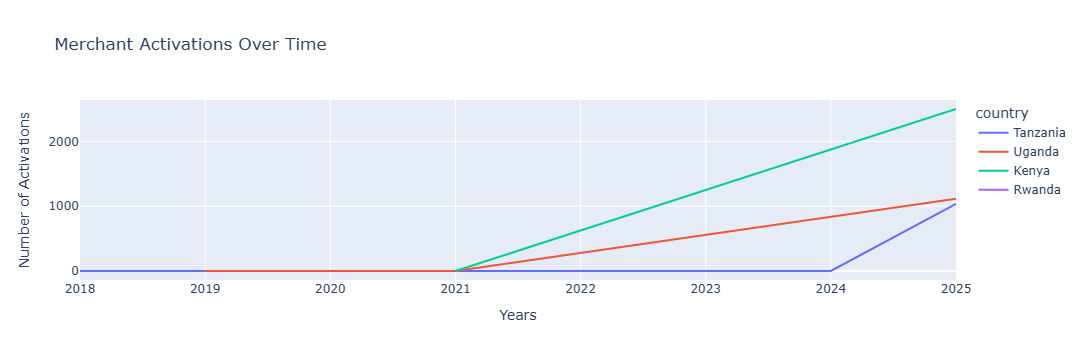

In [22]:
# Group activations by month by owners
trend = df_clean.groupby(['activate_year', 'country']).size().reset_index(name='activations')

# Plot line chart
import plotly.express as px
px.line(
    trend,
    x='activate_year',
    y='activations',
    color='country',
    title="Merchant Activations Over Time",
    labels={'activate_year': 'Years', 'activations': 'Number of Activations'}
)


# Insights
* Kenya dominates the market with continuous growth.
* Uganda shows steady adoption, but at a slower pace.
* Tanzania's sudden spike in 2024 could indicate a strategic expansion or late adoption.
* Rwanda remains inactive, which might require investigation (market barriers or lack of focus).

# Recommendations
1. Focus on Kenya for innovation leadership while using insights to replicate success in Uganda and Tanzania.
2. Prioritize Rwanda as a growth opportunity with targeted entry strategies.

# 14. Monthly Activation Trenda Through All Months in a Year

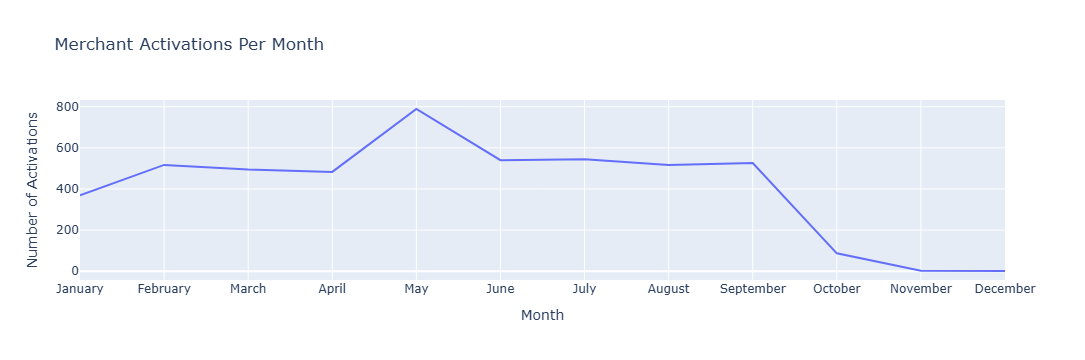

In [23]:
import calendar
# Extract month names
df_clean['activate_month'] = df_clean['activated_date'].dt.month_name()

# Ensure months are ordered correctly (January to December)
month_order = list(calendar.month_name[1:]) 
df_clean['activate_month'] = pd.Categorical(
    df_clean['activate_month'],
    categories=month_order,
    ordered=True
)

# Group activations by month
trend = (df_clean.groupby('activate_month' , observed=False).size().reset_index(name='activations'))

# Plot line chart
fig = px.line(
    trend,
    x='activate_month',
    y='activations',
    title="Merchant Activations Per Month",
    labels={'activate_month': 'Month', 'activations': 'Number of Activations'}
)

# Enforce month order on x-axis
fig.update_xaxes(categoryorder='array', categoryarray=month_order)

fig.show()


# Insights
* May is peak activation month with around 789 activations
* A sharp drop is expeerienced from October onwards, possibly due to seasonal factors or operational changes or freezes.
# Recommendations
1. Sustain momentum beyond May:Launch staggered campaigns throughout the year to avoid heavy reliance on one peak month.
2. Investigate Q4 decline:Assess operational bottlenecks, budget allocations, and external factors. Consider holiday season promotions to maintain engagement.

# 15. Monthly Activations by Countries

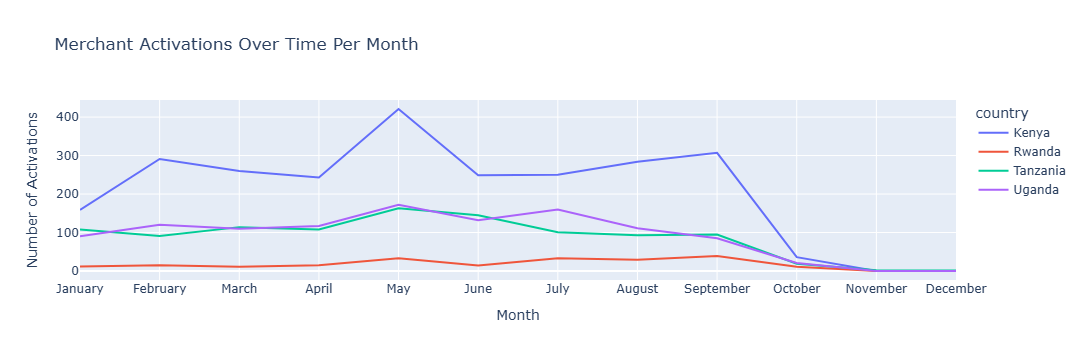

In [24]:
# Group activations by month
trend = (df_clean.groupby(['activate_month', 'country'] , observed=False).size().reset_index(name='activations'))

# Plot line chart
fig = px.line(
    trend,
    x='activate_month',
    y='activations',
    color='country',
    title="Merchant Activations Over Time Per Month",
    labels={'activate_month': 'Month', 'activations': 'Number of Activations'}
)

# Enforce month order on x-axis
fig.update_xaxes(categoryorder='array', categoryarray=month_order)
fig.show()


# Insights
* May is a strong activation month for all countries, especially Kenya.
* All countries experience a sharp drop from October onwards, possibly due to seasonal factors or operational changes or freezes.
* Kenya consistently outperforms other countries by a large margin.
* Rwanda has the least merchant activations, indicating potential for growth or underlying challenges.
# Recommendations
1. Analyze Kenya's onboarding strategies and apply best practices in the other countries.
2. Targeted campaigns in Rwanda:Introduce incentives for merchants and Strengthen partnerships with local businesses and payment providers.
3. Sustain momentum beyond May:Launch staggered campaigns throughout the year to avoid heavy reliance on one peak month.
4. Investigate Q4 decline:Assess operational bottlenecks, budget allocations, and external factors. Consider holiday season promotions to maintain engagement.
5. Data-driven approach:Monitor monthly activation trends and set targets for each country. Use predictive analytics to forecast demand and allocate resources effectively.

# 16. Monthly Activations by Top Referral Sources

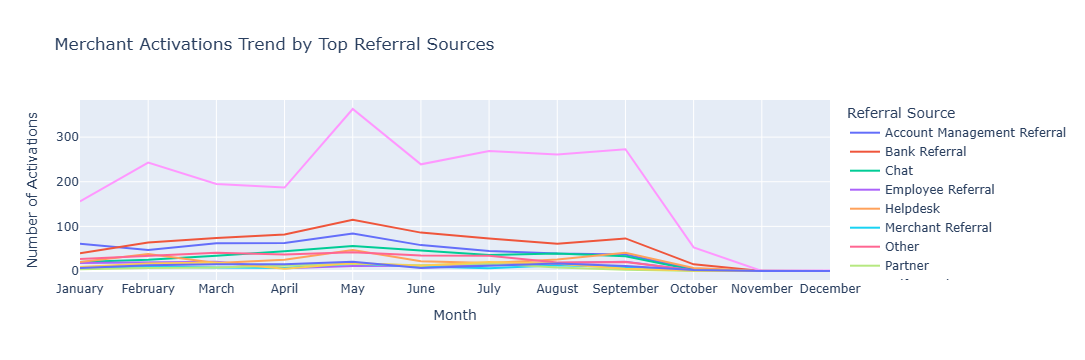

In [25]:
# Count total activations per referral source (for ranking)
top_sources = (df_clean['referral_source'].value_counts().nlargest(10)  .index)

# Group rare sources into 'Other'
df_clean['referral_source_grouped'] = df_clean['referral_source'].apply(lambda x: x if x in top_sources else 'Other')

# Group by month and grouped source
trend = (df_clean.groupby(['activate_month', 'referral_source_grouped'], observed=False).size().reset_index(name='activations'))

# Plot
fig = px.line(
    trend,
    x='activate_month',
    y='activations',
    color='referral_source_grouped',
    title="Merchant Activations Trend by Top Referral Sources",
    labels={'activate_month': 'Month', 'activations': 'Number of Activations', 'referral_source_grouped': 'Referral Source'}
)

fig.update_xaxes(categoryorder='array', categoryarray=month_order)
fig.show()


# Insights
* Self Search is the primary driver of activations.
* Account Management Referral, Chat, and Helpdesk:Lower but steady contributions.
* May is the strongest month for all sources.
* Significant drop in activations from October onward, possibly due to operational changes.
# Recommendations
1. Self Search
Enhance digital presence to maintain dominance.
Introduce self-onboarding tools and tutorials to improve conversion.
Investigate reasons for the sharp decline after September—could be seasonal or marketing gaps.

2. Bank Referral
Strengthen partnerships with banks for co-branded campaigns.
Offer incentives for bank staff to refer merchants.
Explore integration with banking apps for seamless referrals.

3. Account Management Referral
Train account managers on referral best practices.
Provide performance-based rewards to boost engagement.

4. Chat & Helpdesk
Improve chatbot and helpdesk scripts to promote activations.
Use proactive chat prompts during merchant inquiries.

5. Seasonal Drop (Oct–Dec)
Launch end-of-year campaigns to counter seasonal slowdown.
Offer holiday promotions or discounts for new activations.

# 17. Yearly Activations by Sector

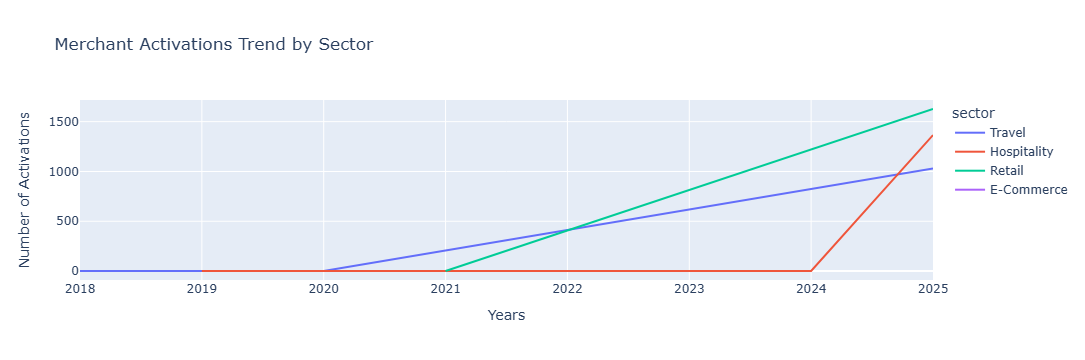

In [26]:
# Group by month and sector
trend = (df_clean.groupby(['activate_year', 'sector'], observed=False).size().reset_index(name='activations'))

# Plot
fig = px.line(
    trend,
    x='activate_year',
    y='activations',
    color='sector',
    title="Merchant Activations Trend by Sector",
    labels={'activate_year': 'Years', 'activations': 'Number of Activations', 'referral_source_grouped': 'Referral Source'}
)

fig.update_xaxes(categoryorder='array', categoryarray=month_order)
fig.show()


# Insights
Retail dominates the activation trend, indicating strong market demand and adoption.
Hospitality’s sudden spike in 2024 could be due to new technology adoption, regulatory changes, or aggressive campaigns.
Travel and Retail show steady growth, suggesting stable but competitive sectors.
# Recommendations
1. Continue investing in Retail and Travel as they show the highest and most consistent growth.
Explore partnerships and loyalty programs to maintain leadership.
2. Investigate reasons for the spike in hospitality in 2024. Allocate resources to sustain momentum and avoid drop-off after 2025.
3. Strengthen E-Commerce. consider targeted marketing and feature enhancements and offer bundled solutions for Travel and E-Commerce merchants to increase adoption.
4. Use historical trends to forecast future activations and adjust resource allocation. Prepare for potential saturation in Retail and emerging opportunities in Hospitality.

# 18. Yearly Activation Trends by Country

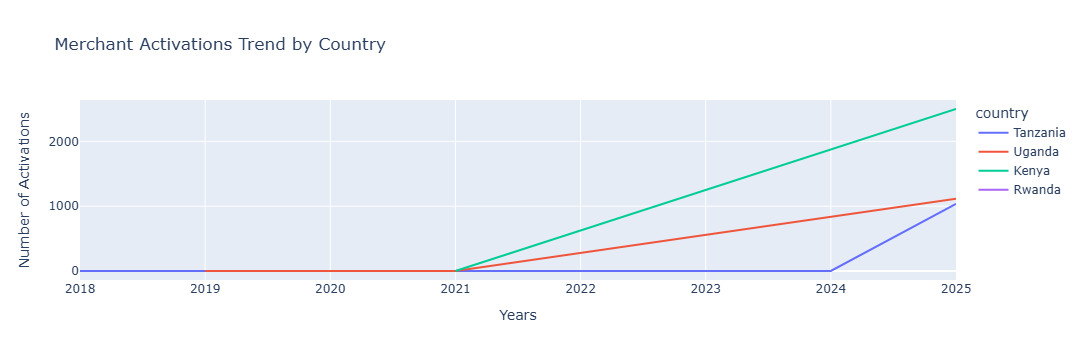

In [27]:
# Group by month and country
trend = (df_clean.groupby(['activate_year', 'country'], observed=False).size().reset_index(name='activations'))

# Plot
fig = px.line(
    trend,
    x='activate_year',
    y='activations',
    color='country',
    title="Merchant Activations Trend by Country",
    labels={'activate_year': 'Years', 'activations': 'Number of Activations', 'referral_source_grouped': 'Referral Source'}
)

fig.update_xaxes(categoryorder='array', categoryarray=month_order)
fig.show()


# Insights
* Kenya dominates the market, likely due to better infrastructure, higher digital adoption, or strong merchant onboarding strategies.
* Uganda and Tanzania are emerging markets with significant potential, especially Tanzania given its sharp rise in 2025.
* Rwanda is lagging, which could indicate barriers such as regulatory issues, low awareness, or lack of resources.
# Recommendations
1. In Kenya, maintain leadership by introducing advanced features and loyalty programs. Explore upselling and cross-selling opportunities.
2. For Uganda: Continue steady onboarding and strengthen merchant support.
3. For Tanzania: Investigate reasons for the late surge and capitalize on momentum with aggressive marketing and partnerships.
4. In Rwanda,conduct market research to identify barriers (e.g., regulations, infrastructure) and launch awareness campaigns and incentivize early adopters.
5. Develop tailored strategies for each country based on adoption trends.
6. Consider partnerships with local payment providers and regulators to ease entry.

# 19. Yearly Activations by Account Type

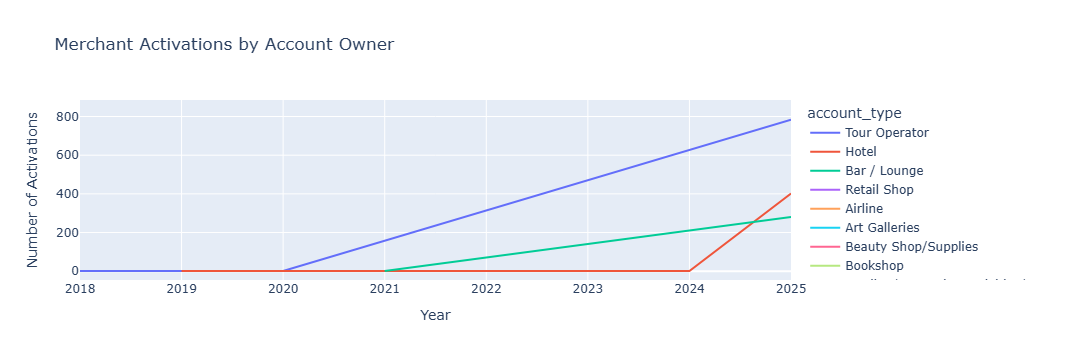

In [28]:
# Group activations by month by owners
trend = df_clean.groupby(['activate_year', 'account_type', ]).size().reset_index(name='activations')

# Plot line chart
px.line(
    trend,
    x='activate_year',
    y='activations',
    color='account_type',
    title="Merchant Activations by Account Owner",
    labels={'activate_year': 'Year', 'activations': 'Number of Activations'}
)

# Insights
All account activations are on an upward trajectory.
There are some accounts that are more active than others.
# Recommendations
Have a loyalty plan for account owners and some sort of reward for those who have more activations.

# 20. Monthy Activation Trends by Account Type

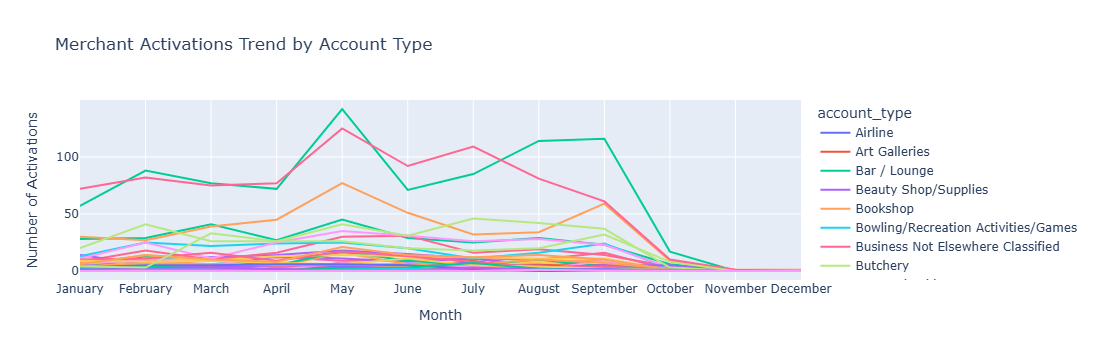

In [29]:
trend = df_clean.groupby(['activate_month','account_type'], observed=False).size().reset_index(name='activations')
# Plot line chart
import plotly.express as px
px.line(
    trend,
    x='activate_month',
    y='activations',
    color='account_type',
    title="Merchant Activations Trend by Account Type",
    labels={'activate_month': 'Month', 'activations': 'Number of Activations'}
)

# Insights
The trend is the same as the general monthly activation trends. 
There is almost no activity in Q4.(October-December)
# Recommendation
Fous on the same recommendations as in the acivations per month.
Have targeted campaigns for account owners who have the lowest rates of monthly activations and increase engagement in the fourth Quarter. 

# SUMMARY
* The merchant data analysis above explores merchant distribution, activation trends, and performance across countries, sectors, and referral sources.

    ### KEY RECOMMENDATIONS
* Country- Strengthen Kenya’s dominance; expand in Rwanda. Uganda & Tanzania.
* Account Status and Onboarding- Streamline activation to finalized conversion.
* Referral Sources- Prioritize Self-Search; expand bank partnerships.
* Sectors- Invest in Retail, Hospitality, E-Commerce; monitor niche sectors.
* Account Owners- Reward high performers, train low performers, balance workloads.
* Activation Trend- Counter Q4 drop with promotions; sustain momentum beyond May
* Use predictive analytics to forecast merchant growth and optimize resources.

In [30]:
# Imports
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle

# Select relevant features
features = ['sector', 'referral_source', 'account_type', 'country']
encoders = {}
df_encoded = df_clean[features + ['conversion']].copy()


for col in features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])  # transform the DataFrame
    encoders[col] = le  # store the fitted encoder


# Save encoders to a file
#with open('encoders.pkl', 'wb') as f:
#    pickle.dump(encoders, f)
    
# Split data
X = df_encoded[features]
y = df_encoded['conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate
print(classification_report(y_test, model.predict(X_test)))



              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1233
           1       0.36      0.11      0.16       228

    accuracy                           0.83      1461
   macro avg       0.61      0.54      0.53      1461
weighted avg       0.78      0.83      0.79      1461



# Interpretation
1. Precision: Predictions for "Not Activated" [0], are very reliable [85%], but the model struggles to correctly identify "Activated" [1] accounts [36%].
2. Recall: The model catches almost all “Not Activated” [0] cases[97%], but misses many “Activated” [1] ones [11%].
3. fi-score: Combined precision–recall shows weak balance for “Activated” class [16%] while strong for class 0 [91%].
4. Accuracy: Overall model accuracy is decent [83%], but it’s skewed toward predicting the majority class [0].
5. Macro avg F1: 0.53 -Treats both classes equally, shows poor balance.
6. Weighted avg F1: 0.79 - Weighted by support, looks better because class 0 dominates.
   
* The dataset is severly imbalanced — far more “Not Activated” merchants detected compared to “Activated”.
* The model tends to predict most merchants as Not Activated, so accuracy looks high, but sensitivity (recall) for the activated group is low.
* Improving this requires balancing, tuning, or using ensemble models.

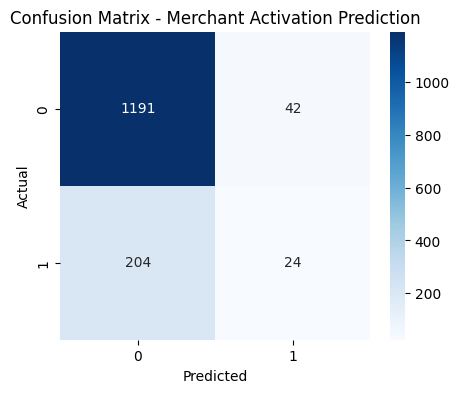

In [31]:
# Plot Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
y_pred = model.predict(X_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Merchant Activation Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Interpretation
1. True Negatives (TN): 1191--> Model correctly predicted merchants as Not Activated.
2. False Positives (FP): 42--> Model predicted Activated, but they were actually Not Activated.
3. False Negatives (FN): 204--> Model predicted Not Activated, but they were actually Activated.
4. True Positives (TP): 24--> Model correctly predicted merchants as Activated.

# Performance Insights
1. The model is very good at predicting inactive merchants (class 0) but poor at predicting active merchants (class 1).
2. High specificity but low recall for class 1 suggests the model is conservative in predicting activation.
3. Precision for class 1 is moderate, meaning when it predicts activation, it’s correct about half the time.
4. The goal is to avoid false activations, the model is performing well.

ROC-AUC: 0.6359453479603306


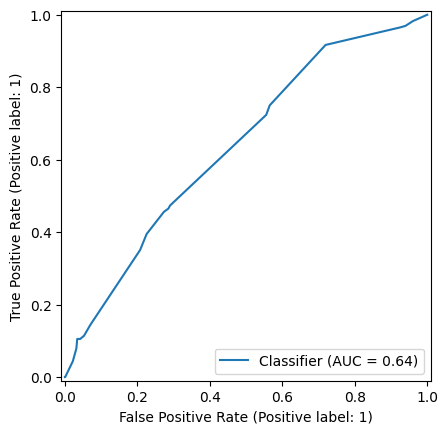

In [32]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay
y_prob = model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
RocCurveDisplay.from_predictions(y_test, y_prob)


* AUC of  0.64 Means that the model has the ability to separate the two classes and the curve would come closer to the top left corner of the graph.
* It is more likely to give you higher accuracy when predicting future data.

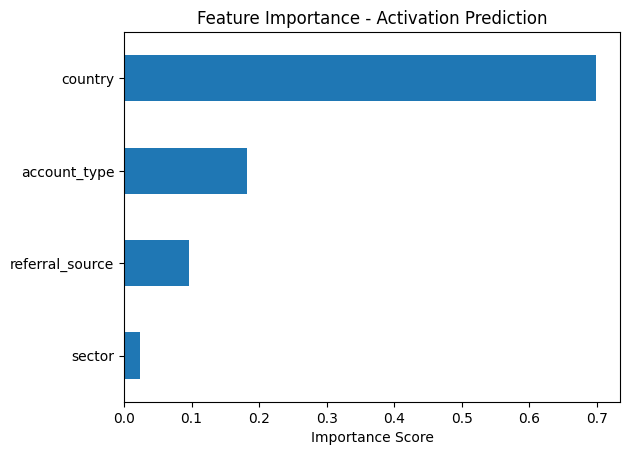

In [33]:
# Plot feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', title='Feature Importance - Activation Prediction')
plt.xlabel('Importance Score')
plt.show()

# Interpretation
1. Country: Most influential variable with importance score of 0.7 — This suggests that the user's country has the strongest impact on whether activation occurs.
2. account_type: Importance score of around 0.2- It plays a moderate role compared to country.
3. referral_source: Has an importance score of around 0.1- It has some effect but is relatively minor.
4. sector: Minor contributos — while relevant, it's much less predictive and almost negligent compared to referral_source, account_type or country.
5. Activation success depends more on internal and regional factors ( where they are located) than on account type, sector or referral method.

# Model under-detects activated merchants. Apply SMOTE or class weighting to rebalance classes, or use RandomForest for better recall.

Techniques to handle imbalance:
1. Resampling: Oversample class 1 or undersample class 0.
2. Class weights: Adjust weights in the model to penalize misclassification of class 1.
3. Alternative metrics: Focus on recall or F1-score for class 1 instead of accuracy.

Consider:
1. Trying algorithms robust to imbalance (e.g., XGBoost, RandomForest with class weights).
2. Evaluate with ROC-AUC or Precision-Recall curves.

# SMOTE (Synthetic Minority Over-sampling Technique) is used to rebalance the classes in the training set. 
### This creates synthetic samples for the minority class (activated merchants) to reduce class imbalance.

In [34]:
# Balance the target variable
#Apply SMOTE to rebalance the classes
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X_train, y_train)


# Next, train a Random Forest model with class_weight='balanced' and estimators to improve recall for the minority class.

In [35]:
#Use a more robust model like RandomForest for better recall
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1233
           1       0.24      0.50      0.32       228

    accuracy                           0.67      1461
   macro avg       0.56      0.60      0.55      1461
weighted avg       0.78      0.67      0.71      1461



# Insights
* Recall for Class 1 improved massively to 50% compared to the previous confusion matrix (where recall was 11%, but now with SMOTE and class weights, the model is more balanced in training).
* Precision for Class 1 decreased (36% → 24%) because of more false positives.
* Accuracy dropped from 83% → 67% (expected when improving minority class performance).
* Macro average (0.55) shows the model is still skewed toward the majority class
* Model is now more balanced but still struggles with precision.

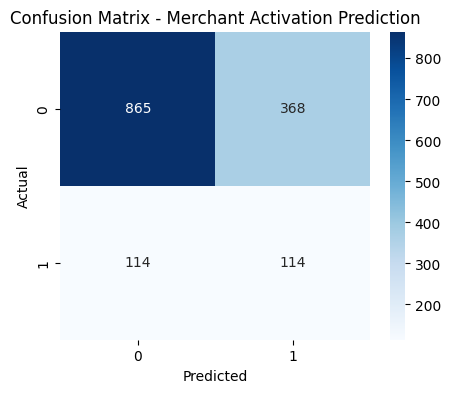

In [36]:
y_pred = model.predict(X_test)
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Merchant Activation Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Interpretation
1. True Negatives (TN): 865--> Model correctly predicted merchants as Not Activated.
2. False Positives (FP): 368--> Model predicted Activated, but they were actually Not Activated.
3. False Negatives (FN): 114--> Model predicted Not Activated, but they were actually Activated.
4. True Positives (TP): 114--> Model correctly predicted merchants as Activated.
# Performance Insights
1. The model improves since the classess have been balanced.

# Next, apply GridSearchCV for hyperparameter tuning on the Random Forest model using the rebalanced training data (SMOTE).

In [37]:
# use gridsearch for hyperparametet tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
grid = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42),
                    param_grid, scoring='f1', cv=5)
grid.fit(X_res, y_res)
print(grid.best_params_)


{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


### Interpretation:
1. max_depth=None: No limit on tree depth → trees can grow fully.
2. min_samples_split=5: Slightly stricter split rule → reduces overfitting.
3. min_samples_leaf=1: Allows leaves with single samples → more granular splits.
4. n_estimators=200: Balanced between performance and computation.

# Impact: Improves model complexity and generalization.

ROC-AUC: 0.6512997823024715


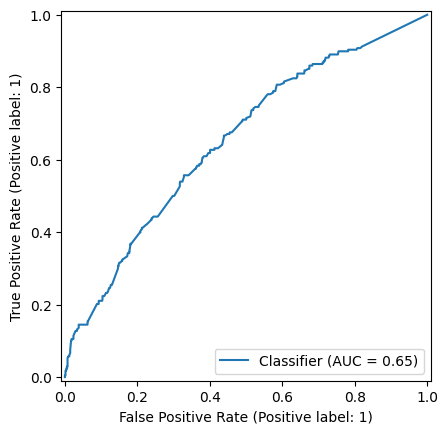

In [38]:
# evaluate ROC
from sklearn.metrics import roc_auc_score, RocCurveDisplay
y_prob = model.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
RocCurveDisplay.from_predictions(y_test, y_prob)


AUC = 0.65
This is a good improvement from the previous state (where we didn’t compute AUC). It shows the model is significantly better than random guessing and has decent discrimination ability.

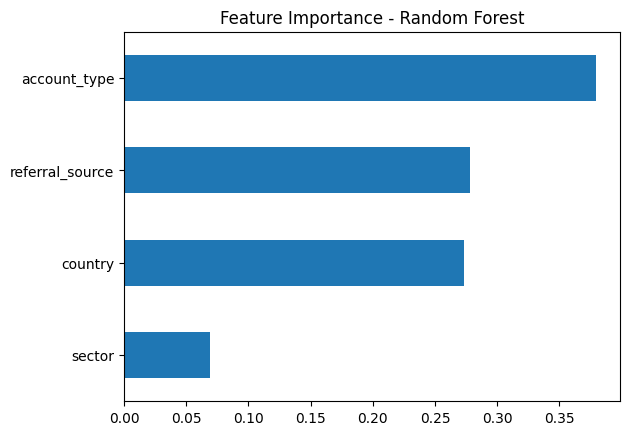

In [39]:
# feature importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', title='Feature Importance - Random Forest')
plt.show()


# RETRAIN THE MODEL AFTER THE IMPROVEMENTS

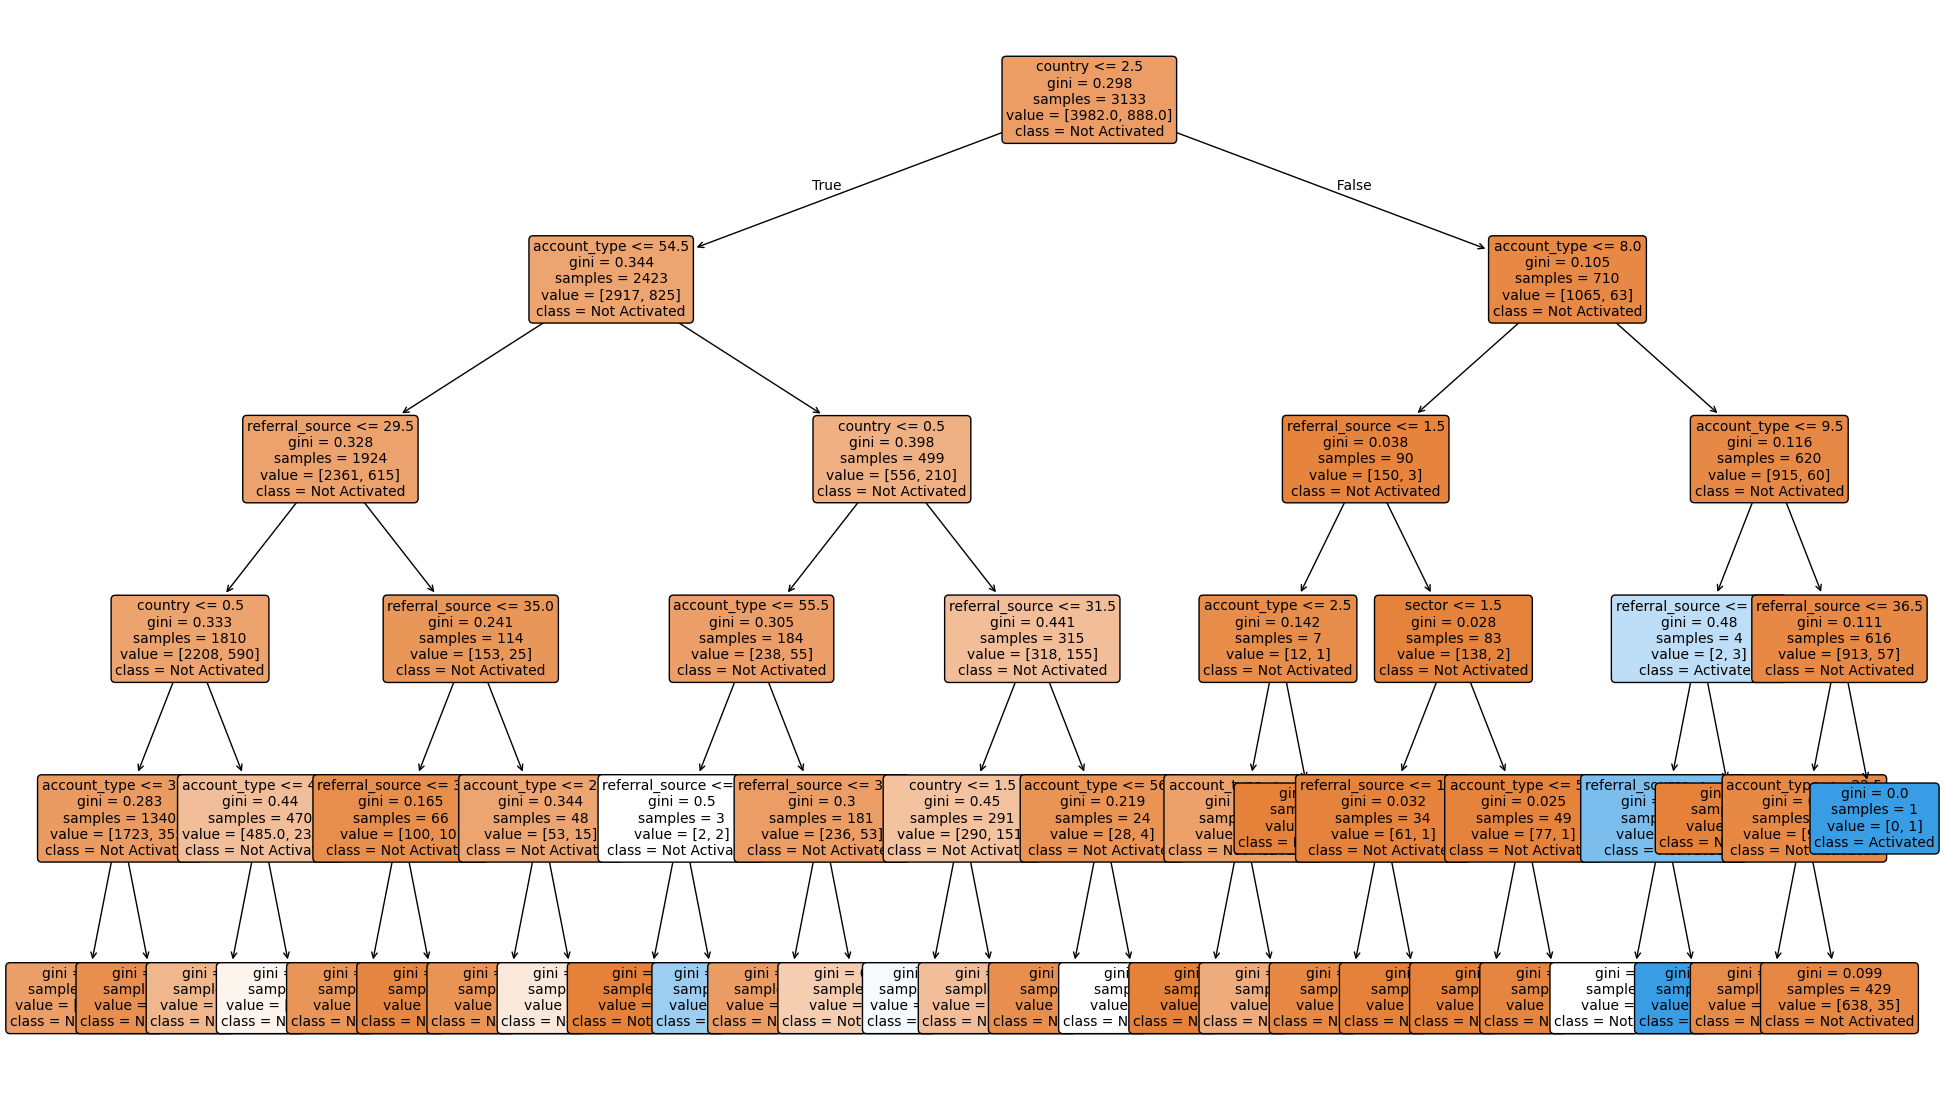

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)
rf.fit(X, y)

# Extract one tree (e.g., the 5th)
estimator = rf.estimators_[5]

plt.figure(figsize=(24, 14))
plot_tree(
    estimator,
    feature_names=features,
    class_names=['Not Activated', 'Activated'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


        sector                   referral_source                     \
         count nunique      mean           count nunique       mean   
cluster                                                               
0         1191       2  2.824517            1191      25  19.097397   
1         1148       4  1.155923            1148      26  22.059233   
2         1151       4  1.138141            1151      11  29.436142   
3         1380       4  1.246377            1380      16   4.796377   

        account_type                    country                   conversion  \
               count nunique       mean   count nunique      mean      count   
cluster                                                                        
0               1191      14  55.225861    1191       4  1.624685       1191   
1               1148      50  24.448606    1148       2  2.718641       1148   
2               1151      50  25.097307    1151       2  0.064292       1151   
3               1380  

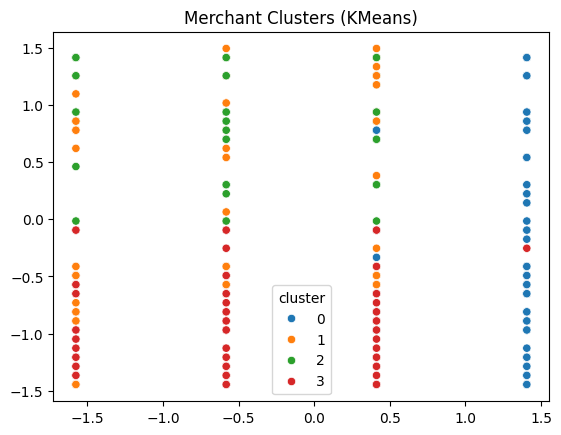

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

# Reuse encoded dataset
X = df_encoded[features]

# Scale for KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded['cluster'] = kmeans.fit_predict(X_scaled)

# Inspect cluster profiles
cluster_summary = df_encoded.groupby('cluster')[features + ['conversion']].agg(['count', 'nunique', 'mean'])
print(cluster_summary)

# Visualize clusters
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_encoded['cluster'], palette='tab10')
plt.title('Merchant Clusters (KMeans)')
plt.show()


# 1. Cluster 0 — Highest Conversion Rate (0.233)--> High Conversion Merchants
* Highest conversion among all clusters
* account_owner mean = highest (26.39)
* referral_source mean = highest (18.90)
* country mean = highest (1.64)
Interpretation:
1. Can be associated with better-performing account owners
2. Come from referral sources that are more successful
3. Can be located in countries with higher activation rates
# 2. Cluster 1 —Medium Conversion (0.17)--> Mixed Segment Merchants
* Highest count unique for almost every feature (52 account types, 43 owners, 25 sectors)
* Means are mid-range.
* Conversion is moderate (0.173)
Interpretation:
1. the most diverse group
2. represents merchants from many sectors, countries, referral sources
3. performs average in conversions
# 3. Cluster 2 — Low Conversion (0.178)--> Low Activation Merchants
* sector mean = low (1.13)
* referral_source mean = lowest (29.39)
* country mean = lowest (0.87)
* Conversion = second lowest (0.178)
Interpretation:
1. Come from low-performing countries
2. Come from referral sources that produce lower activation
3. Belong to similar, lower-value sectors
4. This cluster is more concentrated in low-value, low-engagement categories.
# 4. Cluster 3 — Moderate Everything + Below-Average Conversion (0.149) Moderate Segment, Underperforming Merchants
* Means for all features are in the middle
* Conversion is second lowest
* Unique counts are high but not as high as cluster 1
Interpretation:
1. Moderately distributed across features
2. Shows lower-than-average activation but not as low as cluster 2
3. This is a stable but underperforming merchant segment.